# Sentiment Analysis of Financial News Using NLTK

Predicting the sentiment of fiancial news using nltk.

#About Dataset

This dataset contains 3 csv file

cnbc headline   (3080, 3)

gaurdian headline   (17800, 2)

reuters headline   (32770, 3)


# Columns Provided in the Dataset

cnbc headline
1. time
2. headlines
3. Description

gaurdian headline
1. time
2. headline

reuters headline
1. time
2. headline
3. description


Dataset - 
https://www.kaggle.com/datasets/notlucasp/financial-news-headlines

In [57]:
# Importing all the required libraries 

import numpy as np
import pandas as pd
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
#importing stopwords and text processing libraries

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import nltk

nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')



[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [66]:

#importing machine learning libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report




# Basic EDA on CNBC headlines dataset

In [4]:
# Reading csv file of cnbc headlines using pandas

cnbc_headlines = pd.read_csv('/content/cnbc_headlines.csv')

In [5]:
cnbc_headlines.head()

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer recommended buying..."
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020","""Mad Money"" host Jim Cramer rings the lightnin..."
2,NaN,NaN,NaN
3,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020","""We'll pay more for the earnings of the non-Co..."
4,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020","Keith Bliss, IQ Capital CEO, joins ""Closing Be..."


In [6]:
# checking the shape of cnbc headline dataset

cnbc_headlines.shape

(3080, 3)

In [7]:
# Checking all the columns in the cnbc headline dataset

cnbc_headlines.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [8]:
# Checking which columns have categorical, numerical or boolean values

cnbc_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3080 entries, 0 to 3079
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    2800 non-null   object
 1   Time         2800 non-null   object
 2   Description  2800 non-null   object
dtypes: object(3)
memory usage: 72.3+ KB


In [9]:
# Missing values in all the columnns of cnbc headline dataset

cnbc_headlines.isnull().sum()


Headlines      280
Time           280
Description    280
dtype: int64

There are 280 missing values in headlines, description and time

In [10]:
# dropping nan values in cnbc headline dataset

cnbc_headlines = cnbc_headlines.dropna()

In [12]:
# dropping the duplicate rows 

cnbc_headlines = cnbc_headlines.drop_duplicates(subset=['Headlines', 'Description'], keep='first')


In [15]:
cnbc_headlines.reset_index(drop=True, inplace=True)

In [16]:
# checking the shape of cnbc headline dataset

cnbc_headlines.shape

(2790, 3)

# Basic EDA on Gaurdian headlines dataset

In [17]:
# Reading the csv file of gaurdian headlines using pandas

guardian_headlines = pd.read_csv('/content/guardian_headlines.csv')

In [18]:
guardian_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [19]:
#checking the shape of gaurdian headline dataset

guardian_headlines.shape

(17800, 2)

In [20]:
#checking the columns of gaurdian headline

guardian_headlines.columns

Index(['Time', 'Headlines'], dtype='object')

In [21]:
# Checking which columns have categorical, numerical or boolean values

guardian_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17800 entries, 0 to 17799
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Time       17800 non-null  object
 1   Headlines  17800 non-null  object
dtypes: object(2)
memory usage: 278.2+ KB


In [22]:
# checking null values in gaurdian headlines dataset

guardian_headlines.isnull().sum()

Time         0
Headlines    0
dtype: int64

In [25]:
# dropping duplicate rows in headlines 

guardian_headlines = guardian_headlines.drop_duplicates(subset=['Headlines'], keep='first')


# Basic EDA on reuters headlines

In [26]:
# Reading the csv file of reuters headlines using using pandas

reuters_headlines = pd.read_csv('/content/reuters_headlines.csv')

In [27]:
reuters_headlines.head()

,Headlines,Time,Description
0,TikTok considers London and other locations fo...,Jul 18 2020,TikTok has been in discussions with the UK gov...
1,Disney cuts ad spending on Facebook amid growi...,Jul 18 2020,Walt Disney has become the latest company to ...
2,Trail of missing Wirecard executive leads to B...,Jul 18 2020,Former Wirecard chief operating officer Jan M...
3,Twitter says attackers downloaded data from up...,Jul 18 2020,Twitter Inc said on Saturday that hackers were...
4,U.S. Republicans seek liability protections as...,Jul 17 2020,A battle in the U.S. Congress over a new coron...


In [28]:
#checking the shape of reuters headlines dataset

reuters_headlines.shape

(32770, 3)

In [29]:
#checking the columns of reuters headline dataset

reuters_headlines.columns

Index(['Headlines', 'Time', 'Description'], dtype='object')

In [30]:
# Checking which columns have categorical, numerical or boolean values

reuters_headlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32770 entries, 0 to 32769
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Headlines    32770 non-null  object
 1   Time         32770 non-null  object
 2   Description  32770 non-null  object
dtypes: object(3)
memory usage: 768.2+ KB


In [31]:
# Missing values in all the columnns of reuters headlines dataset

reuters_headlines.isnull().sum()

Headlines      0
Time           0
Description    0
dtype: int64

In [32]:
#dropping the duplicate rows in reuters headlines dataset 

reuters_headlines = reuters_headlines.drop_duplicates(subset=['Headlines', 'Description'], keep='first')


Preprocessing 

In [48]:
# creating a function for preprocessing 
def preprocessing_text(text):
  text = text.lower()
  text = text.translate(str.maketrans("","", string.punctuation))
  stop_word = set(stopwords.words('english'))
  text_tokens = word_tokenize(text)
  filtered_words = [word for word in text_tokens if word not in stop_word]
  ps = PorterStemmer()
  Stemmed_words = [ps.stem(w) for w in filtered_words]
  lemmatizer = WordNetLemmatizer()
  lemma_words = [lemmatizer.lemmatize(w, pos='a') for w in Stemmed_words ]
  return " ".join(lemma_words)


  

SENTIMENT ANAYSIS

In [34]:
# importing sentiment intensity analyzer

from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

# creating sentiment intensity analyzer object

analyzer = SentimentIntensityAnalyzer()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [35]:
#fuction to  decide sentiment as positive, negative or neutral

def get_analysis(score):
  if score <0.0:
    return 'Negative'
  elif score == 0.0:
    return 'Neutral'
  else:
    return 'Positive'

# Working with description on datasets

In [89]:
# concatenating cnbc and reuters headline datasets

new_data = pd.concat([cnbc_headlines, reuters_headlines], axis=0)


In [50]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [37]:
#checking the shape of this new dataset

new_data.shape


(35463, 3)

In [90]:
#making a copy of new dataset 

new_data_copy = new_data.copy()

In [91]:
new_data['Description'] =new_data['Description'].apply(preprocessing_text)

In [52]:
new_data.head(20)

,Headlines,Time,Description
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...
5,Cramer's lightning round: I would just stay lo...,"7:23 PM ET Thu, 16 July 2020",mad money host jim cramer ring lightn round be...
6,Acorns CEO: Parents can turn $5 into five figu...,"8:03 PM ET Thu, 16 July 2020",invest 5 per day compound 70000 time child rea...
7,Dividend cuts may mean rethinking your retirem...,"8:54 AM ET Thu, 16 July 2020",hundr compani cut suspend dividend far year se...
8,StockX has authenticated 1 million Jordan snea...,"8:25 PM ET Wed, 15 July 2020",weve abl captur cultur moment like espn releas...
9,Biohaven Pharmaceuticals lands Khloe Kardashia...,"7:51 PM ET Wed, 15 July 2020",biohaven ceo vlad coric said compani brought k...


In [93]:
# analyzing polarity score of values in description and adding a new column of the same in dataset

ds_score = []

for value in new_data['Description'].values:
  ds_score.append(analyzer.polarity_scores(value)['compound'])


new_data['ds_score'] = ds_score

new_data



,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,0.2500
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,-0.4939
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,0.5574
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,0.7096
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,-0.6486
...,...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,0.0000
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,0.0000
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,-0.2732
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,-0.3818


In [94]:
# applying the function which decides sentiment to the polarity score column

new_data['ds_score'] = new_data['ds_score'].apply(get_analysis) 
new_data

,Headlines,Time,Description,ds_score
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative
...,...,...,...,...
32765,Malaysia says never hired British data firm at...,Mar 20 2018,malaysian govern rule parti tuesday deni ever ...,Neutral
32766,Prosecutors search Volkswagen headquarters in ...,Mar 20 2018,german prosecutor said tuesday search volkswag...,Neutral
32767,McDonald's sets greenhouse gas reduction targets,Mar 20 2018,mcdonald corp tuesday announc approv scienc ba...,Negative
32768,Pratt & Whitney to deliver spare A320neo engin...,Mar 20 2018,pratt whitney soon begin deliveri spare engin ...,Negative


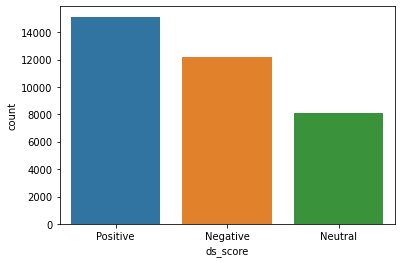

In [58]:
# plotting a count plot on description score column

sns.countplot(x='ds_score', data=new_data)

In the description 

there are approx

14000 positive statment

12000 negative statment

8000 neutral statment

In [60]:
# pie chart on description score column

import plotly.express as px

fig = px.pie(new_data, names='ds_score', title='Pie chart of different sentiments')
fig.show()


In the dataset 

description contains

42.6% positive statments

34.5% negtive statements

22.9% neutral statments

# Modelling on description 

In [95]:
# splitting the dataset  into test and train 

x_train_ds, x_test_ds, y_train_ds, y_test_ds = train_test_split(new_data['Description'], new_data.ds_score, test_size=0.1, random_state=212)


LINEAR SUPPORT VECTOR MACHINE


In [96]:
%%time
# pipeline creation

pipe= Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

linear_svc_model_ds = pipe.fit(x_train_ds, y_train_ds)

prediction = linear_svc_model_ds.predict(x_test_ds)
print('MODEL - LINEAR SVC')

accuracy_lSVC_D = print('accuracy score: {}%'.format(round(accuracy_score(y_test_ds, prediction)*100,2)))

print(confusion_matrix(y_test_ds, prediction))

print(classification_report(y_test_ds, prediction))



MODEL - LINEAR SVC
accuracy score: 93.43%
[[1122   48   54]
 [  26  771   19]
 [  53   33 1421]]
              precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
    Positive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

CPU times: user 1.87 s, sys: 22.6 ms, total: 1.89 s
Wall time: 1.9 s


LOGISTIC REGRESSION


In [97]:
%%time

pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])

log_model_ds = pipe.fit(x_train_ds, y_train_ds)

prediction = log_model_ds.predict(x_test_ds)

print('MODEL - LOGISTIC REGRESSION')

accuracy_log_D = print('accuracy:{}%'.format(round(accuracy_score(y_test_ds, prediction)*100,2)))

print(confusion_matrix(y_test_ds, prediction))
print(classification_report(y_test_ds, prediction))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy:89.48%
[[1048   93   83]
 [  44  740   32]
 [  69   52 1386]]
              precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
    Positive       0.92      0.92      0.92      1507

    accuracy                           0.89      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.89      0.89      3547

CPU times: user 6.53 s, sys: 4.57 s, total: 11.1 s
Wall time: 6.39 s


MULTINOMIAL NAIVE BAYES


In [98]:
%%time

pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])
 
MultinomialNB_model_ds = pipe.fit(x_train_ds, y_train_ds)

prediction = MultinomialNB_model_ds.predict(x_test_ds)
print('MULTINOMIAL NAIVE BAYES')

accuracy_MNB_D = print('accuracy:{}%'.format(round(accuracy_score(y_test_ds, prediction)*100,2)))

print(confusion_matrix(y_test_ds, prediction))
print(classification_report(y_test_ds, prediction))



MULTINOMIAL NAIVE BAYES
accuracy:62.31%
[[ 729    8  487]
 [ 155   98  563]
 [ 117    7 1383]]
              precision    recall  f1-score   support

    Negative       0.73      0.60      0.66      1224
     Neutral       0.87      0.12      0.21       816
    Positive       0.57      0.92      0.70      1507

    accuracy                           0.62      3547
   macro avg       0.72      0.54      0.52      3547
weighted avg       0.69      0.62      0.57      3547

CPU times: user 1.11 s, sys: 53.2 ms, total: 1.16 s
Wall time: 1.17 s


BERNOULLI NAIVE BAYES


In [99]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', BernoulliNB())])
 
BernoulliNB_model_ds = pipe.fit(x_train_ds, y_train_ds)

prediction = BernoulliNB_model_ds.predict(x_test_ds)
print('MULTINOMIAL NAIVE BAYES')

accuracy_BNB_D = print('accuracy:{}%'.format(round(accuracy_score(y_test_ds, prediction)*100,2)))

print(confusion_matrix(y_test_ds, prediction))
print(classification_report(y_test_ds, prediction))



MULTINOMIAL NAIVE BAYES
accuracy:73.61%
[[ 879   70  275]
 [ 127  496  193]
 [ 198   73 1236]]
              precision    recall  f1-score   support

    Negative       0.73      0.72      0.72      1224
     Neutral       0.78      0.61      0.68       816
    Positive       0.73      0.82      0.77      1507

    accuracy                           0.74      3547
   macro avg       0.74      0.72      0.73      3547
weighted avg       0.74      0.74      0.73      3547

CPU times: user 1.15 s, sys: 57.3 ms, total: 1.21 s
Wall time: 1.22 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [100]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators = 10, max_depth = 5, random_state=55))])
 
GB_model_ds = pipe.fit(x_train_ds, y_train_ds)

prediction = GB_model_ds.predict(x_test_ds)
print('MULTINOMIAL NAIVE BAYES')

accuracy_GBC_D = print('accuracy:{}%'.format(round(accuracy_score(y_test_ds, prediction)*100,2)))

print(confusion_matrix(y_test_ds, prediction))
print(classification_report(y_test_ds, prediction))


MULTINOMIAL NAIVE BAYES
accuracy:42.68%
[[   9    0 1215]
 [   0    0  816]
 [   2    0 1505]]
              precision    recall  f1-score   support

    Negative       0.82      0.01      0.01      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.43      1.00      0.60      1507

    accuracy                           0.43      3547
   macro avg       0.41      0.34      0.20      3547
weighted avg       0.46      0.43      0.26      3547

CPU times: user 15.2 s, sys: 350 ms, total: 15.6 s
Wall time: 15.5 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [101]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', XGBClassifier(loss='deviance', learning_rate=0.01, n_estimators = 10, max_depth = 5, random_state=2020))])
 
XGB_model_ds = pipe.fit(x_train_ds, y_train_ds)

prediction = XGB_model_ds.predict(x_test_ds)
print('MULTINOMIAL NAIVE BAYES')

accuracy_XGB_D = print('accuracy:{}%'.format(round(accuracy_score(y_test_ds, prediction)*100,2)))

print(confusion_matrix(y_test_ds, prediction))
print(classification_report(y_test_ds, prediction))

MULTINOMIAL NAIVE BAYES
accuracy:49.62%
[[ 289    1  934]
 [   2    0  814]
 [  36    0 1471]]
              precision    recall  f1-score   support

    Negative       0.88      0.24      0.37      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.46      0.98      0.62      1507

    accuracy                           0.50      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.50      0.50      0.39      3547

CPU times: user 8.04 s, sys: 58.5 ms, total: 8.1 s
Wall time: 9.22 s


DECISION TREE CLASSIFICATION MODEL


In [102]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth = 10, random_state=2020))])
 
DT_model_ds = pipe.fit(x_train_ds, y_train_ds)

prediction = DT_model_ds.predict(x_test_ds)
print('MULTINOMIAL NAIVE BAYES')

accuracy_DT_D = print('accuracy:{}%'.format(round(accuracy_score(y_test_ds, prediction)*100,2)))

print(confusion_matrix(y_test_ds, prediction))
print(classification_report(y_test_ds, prediction))


MULTINOMIAL NAIVE BAYES
accuracy:51.2%
[[1088    1  135]
 [ 809    0    7]
 [ 779    0  728]]
              precision    recall  f1-score   support

    Negative       0.41      0.89      0.56      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.84      0.48      0.61      1507

    accuracy                           0.51      3547
   macro avg       0.41      0.46      0.39      3547
weighted avg       0.50      0.51      0.45      3547

CPU times: user 3.24 s, sys: 15.4 ms, total: 3.26 s
Wall time: 3.26 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [103]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', KNeighborsClassifier(n_neighbors=10,weights= 'distance', algorithm = 'brute'))])
 
KNN_model_ds = pipe.fit(x_train_ds, y_train_ds)

prediction = KNN_model_ds.predict(x_test_ds)
print('MULTINOMIAL NAIVE BAYES')

accuracy_KNN_D = print('accuracy:{}%'.format(round(accuracy_score(y_test_ds, prediction)*100,2)))

print(confusion_matrix(y_test_ds, prediction))
print(classification_report(y_test_ds, prediction))


MULTINOMIAL NAIVE BAYES
accuracy:57.26%
[[ 672  145  407]
 [ 191  291  334]
 [ 249  190 1068]]
              precision    recall  f1-score   support

    Negative       0.60      0.55      0.58      1224
     Neutral       0.46      0.36      0.40       816
    Positive       0.59      0.71      0.64      1507

    accuracy                           0.57      3547
   macro avg       0.55      0.54      0.54      3547
weighted avg       0.57      0.57      0.57      3547

CPU times: user 5.14 s, sys: 1.58 s, total: 6.71 s
Wall time: 7.12 s


In [104]:
# function for comparing models matric

def compare_models(models,names,x_train_ds,y_train_ds,x_test_ds,y_test_ds):
  import sklearn.metrics as metrics 
  from sklearn.model_selection import train_test_split 

  for (model,name) in zip(models,names):
    print(name)
    y_pred =  model.predict(x_test_ds)
    res = classification_report(y_test_ds, y_pred)
    print("Classification Report \n",res)
    print("---------------------------------------------------------------------------------------")

In [82]:
models= [linear_svc_model_ds, log_model_ds, MultinomialNB_model_ds, BernoulliNB_model_ds, GB_model_ds, XGB_model_ds, DT_model_ds, KNN_model_ds]
names = ['linearSVC', 'logistic','MultinomialNB', 'BernoulliNB', 'gradientboost','XGB','decisiontree', 'KNN']

compare_models(models,names,x_train_ds,y_train_ds,x_test_ds,y_test_ds)


linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.93      0.92      0.93      1224
     Neutral       0.90      0.94      0.92       816
    Positive       0.95      0.94      0.95      1507

    accuracy                           0.93      3547
   macro avg       0.93      0.93      0.93      3547
weighted avg       0.93      0.93      0.93      3547

---------------------------------------------------------------------------------------
logistic
Classification Report 
               precision    recall  f1-score   support

    Negative       0.90      0.86      0.88      1224
     Neutral       0.84      0.91      0.87       816
    Positive       0.92      0.92      0.92      1507

    accuracy                           0.89      3547
   macro avg       0.89      0.89      0.89      3547
weighted avg       0.90      0.89      0.89      3547

-----------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.88      0.24      0.37      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.46      0.98      0.62      1507

    accuracy                           0.50      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.50      0.50      0.39      3547

---------------------------------------------------------------------------------------
decisiontree
Classification Report 
               precision    recall  f1-score   support

    Negative       0.41      0.89      0.56      1224
     Neutral       0.00      0.00      0.00       816
    Positive       0.84      0.48      0.61      1507

    accuracy                           0.51      3547
   macro avg       0.41      0.46      0.39      3547
weighted avg       0.50      0.51      0.45      3547

---------------------------------------------------------------------------------------
K

# working with test dataset

In [105]:
# Performing  prediction on the test dataset

y_predicted = linear_svc_model_ds.predict(x_test_ds)
y_predicted

array(['Negative', 'Negative', 'Negative', ..., 'Negative', 'Positive',
       'Neutral'], dtype=object)

In [106]:
# creating a dataframe of predicted results 

predictions = pd.DataFrame(y_predicted)

In [85]:
predictions.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


# Now working with headlines + description

In [107]:
# merging headlines and description of new dataset and naming it info

new_data['info'] = new_data['Headlines'] + new_data['Description']  
new_data.head()

,Headlines,Time,Description,ds_score,info
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020",mad money host jim cramer recommend buy four c...,Positive,Jim Cramer: A better way to invest in the Covi...
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020",mad money host jim cramer ring lightn round be...,Negative,Cramer's lightning round: I would own Teradyne...
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020",well pay earn noncovid compani lancet publish ...,Positive,"Cramer's week ahead: Big week for earnings, ev..."
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020",keith bliss iq capit ceo join close bell talk ...,Positive,IQ Capital CEO Keith Bliss says tech and healt...
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020",look stock highqual compani go low even though...,Negative,Wall Street delivered the 'kind of pullback I'...


In [108]:
# only keeping info and time columns and dropping rest
 
new_data = new_data.drop(columns=['Headlines','Description','ds_score'])
new_data.head()

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",Jim Cramer: A better way to invest in the Covi...
1,"7:33 PM ET Fri, 17 July 2020",Cramer's lightning round: I would own Teradyne...
2,"7:25 PM ET Fri, 17 July 2020","Cramer's week ahead: Big week for earnings, ev..."
3,"4:24 PM ET Fri, 17 July 2020",IQ Capital CEO Keith Bliss says tech and healt...
4,"7:36 PM ET Thu, 16 July 2020",Wall Street delivered the 'kind of pullback I'...


In [ ]:
# applying preprocessing on info column

new_data['info'] = new_data['info'].apply(preprocessing_text)


In [110]:
new_data.head(20)

,Time,info
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...
5,"7:23 PM ET Thu, 16 July 2020",cramer lightn round would stay long wexmad mon...
6,"8:03 PM ET Thu, 16 July 2020",acorn ceo parent turn 5 five figur kid power c...
7,"8:54 AM ET Thu, 16 July 2020",dividend cut may mean rethink retir incom stra...
8,"8:25 PM ET Wed, 15 July 2020",stockx authent 1 million jordan sneaker year c...
9,"7:51 PM ET Wed, 15 July 2020",biohaven pharmaceut land khloe kardashian infl...


In [111]:
# analyzing the polarity score of values in info and adding a new column the same in dataset

info_score = []

for value in new_data['info'].values:
  info_score.append(analyzer.polarity_scores(value)['compound'])


new_data['info_score'] = info_score
new_data


,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,0.7964
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,0.0000
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,0.3612
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,0.8625
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,-0.2263
...,...,...,...
32765,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32766,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32767,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,-0.2732
32768,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,-0.3818


In [112]:
# applying the function which decides sentiment to polarity score column

new_data['info_score'] = new_data['info_score'].apply(get_analysis)
new_data

,Time,info,info_score
0,"7:51 PM ET Fri, 17 July 2020",jim cramer good way invest covid19 vaccin gold...,Positive
1,"7:33 PM ET Fri, 17 July 2020",cramer lightn round would teradynemad money ho...,Neutral
2,"7:25 PM ET Fri, 17 July 2020",cramer week ahead big week earn even big week ...,Positive
3,"4:24 PM ET Fri, 17 July 2020",iq capit ceo keith bliss say tech healthcar ra...,Positive
4,"7:36 PM ET Thu, 16 July 2020",wall street deliv kind pullback ive wait jim c...,Negative
...,...,...,...
32765,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32766,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32767,Mar 20 2018,mcdonald set greenhous ga reduct targetsmcdona...,Negative
32768,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Negative


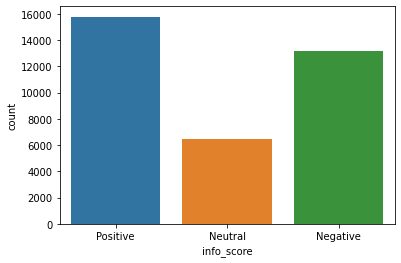

In [113]:
# performing count plot on info_score column

sns.countplot(x='info_score', data=new_data)

In the info

there are approx

15500 positive statment

13000 negative statment

6500 neutral statment

In [114]:
# performing pie chart on info_score column

fig = px.pie(new_data, names = 'info_score', title = 'Pie chart of different sentiments')
fig.show()

In the dataset

info contains

44.5% positive statments

37.2% negtive statements

18.3% neutral statments

# modeling on headlines + description

In [115]:
X_train_hl_ds, X_test_hl_ds, Y_train_hl_ds, Y_test_hl_ds = train_test_split(new_data['info'], new_data.info_score, test_size=0.1, random_state=212)

LINEAR SUPPORT VECTOR MACHINE


In [117]:
%%time
pipe= Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

linear_svc_model_hl_ds = pipe.fit(X_train_hl_ds, Y_train_hl_ds)

prediction = linear_svc_model_hl_ds.predict(X_test_hl_ds)
print('MODEL - LINEAR SVC')

print('accuracy score: {}%'.format(round(accuracy_score(Y_test_hl_ds, prediction)*100,2)))

print(confusion_matrix(Y_test_hl_ds, prediction))

print(classification_report(Y_test_hl_ds, prediction))


MODEL - LINEAR SVC
accuracy score: 90.7%
[[1183   57   83]
 [  45  565   48]
 [  55   42 1469]]
              precision    recall  f1-score   support

    Negative       0.92      0.89      0.91      1323
     Neutral       0.85      0.86      0.85       658
    Positive       0.92      0.94      0.93      1566

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547

CPU times: user 3.02 s, sys: 107 ms, total: 3.12 s
Wall time: 3.11 s


LOGISTIC REGRESSION


In [118]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])

log_model_hl_ds = pipe.fit(X_train_hl_ds, Y_train_hl_ds)

prediction = log_model_hl_ds.predict(X_test_hl_ds)

print('MODEL - LOGISTIC REGRESSION')
print('accuracy:{}%'.format(round(accuracy_score(Y_test_hl_ds, prediction)*100,2)))

print(confusion_matrix(Y_test_hl_ds, prediction))
print(classification_report(Y_test_hl_ds, prediction))
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy:86.86%
[[1139   68  116]
 [  81  495   82]
 [  80   39 1447]]
              precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      1323
     Neutral       0.82      0.75      0.79       658
    Positive       0.88      0.92      0.90      1566

    accuracy                           0.87      3547
   macro avg       0.86      0.85      0.85      3547
weighted avg       0.87      0.87      0.87      3547

CPU times: user 11.1 s, sys: 6.98 s, total: 18.1 s
Wall time: 10.6 s


MULTINOMIAL NAIVE BAYES


In [123]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])
 
MultinomialNB_model_hl_ds = pipe.fit(X_train_hl_ds, Y_train_hl_ds)

prediction = MultinomialNB_model_hl_ds.predict(X_test_hl_ds)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(Y_test_hl_ds, prediction)*100,2)))

print(confusion_matrix(Y_test_hl_ds, prediction))
print(classification_report(Y_test_hl_ds, prediction))
 

MULTINOMIAL NAIVE BAYES
accuracy:62.9%
[[ 780    1  542]
 [ 145    9  504]
 [ 122    2 1442]]
              precision    recall  f1-score   support

    Negative       0.74      0.59      0.66      1323
     Neutral       0.75      0.01      0.03       658
    Positive       0.58      0.92      0.71      1566

    accuracy                           0.63      3547
   macro avg       0.69      0.51      0.47      3547
weighted avg       0.67      0.63      0.56      3547

CPU times: user 1.55 s, sys: 11.7 ms, total: 1.56 s
Wall time: 1.58 s


BERNOULLI NAIVE BAYES


In [130]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', BernoulliNB())])
 
BernoulliNB_model_hl_ds = pipe.fit(X_train_hl_ds, Y_train_hl_ds)

prediction = BernoulliNB_model_hl_ds.predict(X_test_hl_ds)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(Y_test_hl_ds, prediction)*100,2)))

print(confusion_matrix(Y_test_hl_ds, prediction))
print(classification_report(Y_test_hl_ds, prediction))
 

MULTINOMIAL NAIVE BAYES
accuracy:68.54%
[[ 947   13  363]
 [ 173  154  331]
 [ 217   19 1330]]
              precision    recall  f1-score   support

    Negative       0.71      0.72      0.71      1323
     Neutral       0.83      0.23      0.36       658
    Positive       0.66      0.85      0.74      1566

    accuracy                           0.69      3547
   macro avg       0.73      0.60      0.61      3547
weighted avg       0.71      0.69      0.66      3547

CPU times: user 2.77 s, sys: 76.2 ms, total: 2.84 s
Wall time: 4.63 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [125]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators = 10, max_depth = 5, random_state=55))])
 
GB_model_hl_ds = pipe.fit(X_train_hl_ds, Y_train_hl_ds)

prediction = GB_model_hl_ds.predict(X_test_hl_ds)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(Y_test_hl_ds, prediction)*100,2)))

print(confusion_matrix(Y_test_hl_ds, prediction))
print(classification_report(Y_test_hl_ds, prediction))

 

MULTINOMIAL NAIVE BAYES
accuracy:44.4%
[[  11    0 1312]
 [   0    0  658]
 [   2    0 1564]]
              precision    recall  f1-score   support

    Negative       0.85      0.01      0.02      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.44      1.00      0.61      1566

    accuracy                           0.44      3547
   macro avg       0.43      0.34      0.21      3547
weighted avg       0.51      0.44      0.28      3547

CPU times: user 34.2 s, sys: 110 ms, total: 34.3 s
Wall time: 45.9 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [126]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', XGBClassifier(loss='deviance', learning_rate=0.01, n_estimators = 10, max_depth = 5, random_state=2020))])
 
XGB_model_hl_ds = pipe.fit(X_train_hl_ds, Y_train_hl_ds)

prediction = XGB_model_hl_ds.predict(X_test_hl_ds)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(Y_test_hl_ds, prediction)*100,2)))

print(confusion_matrix(Y_test_hl_ds, prediction))
print(classification_report(Y_test_hl_ds, prediction))


MULTINOMIAL NAIVE BAYES
accuracy:51.42%
[[ 306    0 1017]
 [   0    0  658]
 [  48    0 1518]]
              precision    recall  f1-score   support

    Negative       0.86      0.23      0.36      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.48      0.97      0.64      1566

    accuracy                           0.51      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.53      0.51      0.42      3547

CPU times: user 17.7 s, sys: 158 ms, total: 17.8 s
Wall time: 27.2 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



DECISION TREE CLASSIFICATION MODEL


In [127]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth = 10, random_state=2020))])
 
DT_model_hl_ds = pipe.fit(X_train_hl_ds, Y_train_hl_ds)

prediction = DT_model_hl_ds.predict(X_test_hl_ds)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(Y_test_hl_ds, prediction)*100,2)))

print(confusion_matrix(Y_test_hl_ds, prediction))
print(classification_report(Y_test_hl_ds, prediction))


MULTINOMIAL NAIVE BAYES
accuracy:53.23%
[[1174    2  147]
 [ 653    0    5]
 [ 850    2  714]]
              precision    recall  f1-score   support

    Negative       0.44      0.89      0.59      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.82      0.46      0.59      1566

    accuracy                           0.53      3547
   macro avg       0.42      0.45      0.39      3547
weighted avg       0.53      0.53      0.48      3547

CPU times: user 7.2 s, sys: 53.8 ms, total: 7.25 s
Wall time: 14 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [128]:
%%time
# pipeline creation 
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', KNeighborsClassifier(n_neighbors=10,weights= 'distance', algorithm = 'brute'))])
 
KNN_model_hl_ds = pipe.fit(X_train_hl_ds, Y_train_hl_ds)

prediction = KNN_model_hl_ds.predict(X_test_hl_ds)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(Y_test_hl_ds, prediction)*100,2)))

print(confusion_matrix(Y_test_hl_ds, prediction))
print(classification_report(Y_test_hl_ds, prediction))


MULTINOMIAL NAIVE BAYES
accuracy:57.01%
[[ 757   86  480]
 [ 191  159  308]
 [ 336  124 1106]]
              precision    recall  f1-score   support

    Negative       0.59      0.57      0.58      1323
     Neutral       0.43      0.24      0.31       658
    Positive       0.58      0.71      0.64      1566

    accuracy                           0.57      3547
   macro avg       0.53      0.51      0.51      3547
weighted avg       0.56      0.57      0.56      3547

CPU times: user 6.61 s, sys: 2.12 s, total: 8.73 s
Wall time: 9.06 s


In [129]:
# function for comparing models 

def compare_models(models,names,X_train_hl_ds, X_test_hl_ds, Y_train_hl_ds, Y_test_hl_ds):
  import sklearn.metrics as metrics 
  from sklearn.model_selection import train_test_split 

  for (model,name) in zip(models,names):
    print(name)
    y_pred =  model.predict(X_test_hl_ds)
    res = classification_report(Y_test_hl_ds, y_pred)
    print("Classification Report \n",res)
    print("---------------------------------------------------------------------------------------")
    

In [131]:
models= [linear_svc_model_hl_ds, log_model_hl_ds, MultinomialNB_model_hl_ds, BernoulliNB_model_hl_ds, GB_model_hl_ds, XGB_model_hl_ds, DT_model_hl_ds, KNN_model_hl_ds]
names = ['linearSVC', 'logistic','MultinomialNB', 'BernoulliNB', 'gradientboost','XGB','decisiontree', 'KNN']

compare_models(models,names,X_train_hl_ds, X_test_hl_ds, Y_train_hl_ds, Y_test_hl_ds)

linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.92      0.89      0.91      1323
     Neutral       0.85      0.86      0.85       658
    Positive       0.92      0.94      0.93      1566

    accuracy                           0.91      3547
   macro avg       0.90      0.90      0.90      3547
weighted avg       0.91      0.91      0.91      3547

---------------------------------------------------------------------------------------
logistic
Classification Report 
               precision    recall  f1-score   support

    Negative       0.88      0.86      0.87      1323
     Neutral       0.82      0.75      0.79       658
    Positive       0.88      0.92      0.90      1566

    accuracy                           0.87      3547
   macro avg       0.86      0.85      0.85      3547
weighted avg       0.87      0.87      0.87      3547

-----------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.85      0.01      0.02      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.44      1.00      0.61      1566

    accuracy                           0.44      3547
   macro avg       0.43      0.34      0.21      3547
weighted avg       0.51      0.44      0.28      3547

---------------------------------------------------------------------------------------
XGB


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.86      0.23      0.36      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.48      0.97      0.64      1566

    accuracy                           0.51      3547
   macro avg       0.45      0.40      0.33      3547
weighted avg       0.53      0.51      0.42      3547

---------------------------------------------------------------------------------------
decisiontree
Classification Report 
               precision    recall  f1-score   support

    Negative       0.44      0.89      0.59      1323
     Neutral       0.00      0.00      0.00       658
    Positive       0.82      0.46      0.59      1566

    accuracy                           0.53      3547
   macro avg       0.42      0.45      0.39      3547
weighted avg       0.53      0.53      0.48      3547

---------------------------------------------------------------------------------------
K

# working with test data

In [132]:
# Performing the prediction on test dataset

y_predicted = linear_svc_model_hl_ds.predict(X_test_hl_ds)
y_predicted

array(['Negative', 'Negative', 'Negative', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [133]:
# creating a dataframe of predicted results 

predictions = pd.DataFrame(y_predicted)

In [134]:
predictions.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


# now working on headlines

In [135]:
#  deleting the column of description from the dataset copied before

new_data_copy = new_data_copy.drop(columns=['Description'], axis=1) 
new_data_copy.head()

,Headlines,Time
0,Jim Cramer: A better way to invest in the Covi...,"7:51 PM ET Fri, 17 July 2020"
1,Cramer's lightning round: I would own Teradyne,"7:33 PM ET Fri, 17 July 2020"
2,"Cramer's week ahead: Big week for earnings, ev...","7:25 PM ET Fri, 17 July 2020"
3,IQ Capital CEO Keith Bliss says tech and healt...,"4:24 PM ET Fri, 17 July 2020"
4,Wall Street delivered the 'kind of pullback I'...,"7:36 PM ET Thu, 16 July 2020"


In [137]:
# renaming the date column in gaurdian headlines dataset to time

guardian_headlines = guardian_headlines.rename(columns={'Date': 'Time'})
guardian_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [138]:
# joining the gaurdian headlines dataset and copy of dataset to get all headlines together

all_headlines = pd.concat([guardian_headlines,new_data_copy], axis=0)


In [139]:
all_headlines.head()

,Time,Headlines
0,18-Jul-20,Johnson is asking Santa for a Christmas recovery
1,18-Jul-20,‘I now fear the worst’: four grim tales of wor...
2,18-Jul-20,Five key areas Sunak must tackle to serve up e...
3,18-Jul-20,Covid-19 leaves firms ‘fatally ill-prepared’ f...
4,18-Jul-20,The Week in Patriarchy \n\n\n Bacardi's 'lad...


In [140]:
# checking the shape of all headlines dataset

all_headlines.shape

(53258, 2)

In [141]:
#applying preprocessing to the headlines column in the new dataset
 
all_headlines['Headlines'] = all_headlines['Headlines'].apply(preprocessing_text)
all_headlines.head()

,Time,Headlines
0,18-Jul-20,johnson ask santa christma recoveri
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...
2,18-Jul-20,five key area sunak must tackl serv econom rec...
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...


In [143]:
# analyzing the polarity score of values in headlines and adding a new column of the same in dataset

hl_score = []

for value in all_headlines['Headlines'].values:
  hl_score.append(analyzer.polarity_scores(value)['compound'])

all_headlines['hl_score'] = hl_score

all_headlines



,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,0.0000
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,-0.8860
2,18-Jul-20,five key area sunak must tackl serv econom rec...,0.0000
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,-0.5423
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,-0.4939
...,...,...,...
32765,Mar 20 2018,malaysia say never hire british data firm cent...,0.0000
32766,Mar 20 2018,prosecutor search volkswagen headquart new emi...,0.0000
32767,Mar 20 2018,mcdonald set greenhous ga reduct target,0.0000
32768,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,0.0000


In [144]:
# applying the function  which decides sentiment to polarity score column

all_headlines['hl_score'] = all_headlines['hl_score'].apply(get_analysis)
all_headlines

,Time,Headlines,hl_score
0,18-Jul-20,johnson ask santa christma recoveri,Neutral
1,18-Jul-20,‘ fear bad ’ four grim tale work life upend co...,Negative
2,18-Jul-20,five key area sunak must tackl serv econom rec...,Neutral
3,18-Jul-20,covid19 leav firm ‘ fatal illprepar ’ nodeal b...,Negative
4,18-Jul-20,week patriarchi bacardi ladi vodka late long l...,Negative
...,...,...,...
32765,Mar 20 2018,malaysia say never hire british data firm cent...,Neutral
32766,Mar 20 2018,prosecutor search volkswagen headquart new emi...,Neutral
32767,Mar 20 2018,mcdonald set greenhous ga reduct target,Neutral
32768,Mar 20 2018,pratt whitney deliv spare a320neo engin soon i...,Neutral


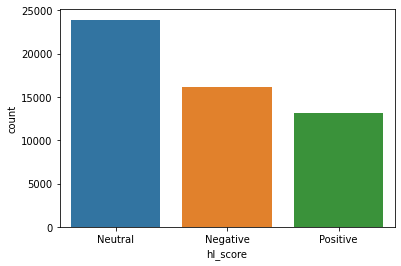

In [145]:
#performing countplot on headline score column

sns.countplot(x='hl_score', data=all_headlines)


In the headlines

there are approx

14000 positive statment

16000 negative statment

24000 neutral statment

In [146]:
#performing pie digram on headline score column

fig = px.pie(all_headlines, names='hl_score', title = 'Pie chart of different sentiments')
fig.show()


In the dataset

headlines contains

24.8% positive statments

30.3% negtive statements

44.9% neutral statments

# Modeling on headlines

In [147]:
train_x_hl, test_x_hl, train_y_hl, test_y_hl = train_test_split(all_headlines['Headlines'], all_headlines.hl_score, test_size=0.1, random_state=212)



LINEAR SUPPORT VECTOR MACHINE

In [148]:
%%time
pipe= Pipeline([('tfidf', TfidfVectorizer()),
                 ('model', LinearSVC())])

linear_svc_model_hl = pipe.fit(train_x_hl, train_y_hl)

prediction = linear_svc_model_hl.predict(test_x_hl)
print('MODEL - LINEAR SVC')

print('accuracy score: {}%'.format(round(accuracy_score(test_y_hl, prediction)*100,2)))

print(confusion_matrix(test_y_hl, prediction))

print(classification_report(test_y_hl, prediction))


MODEL - LINEAR SVC
accuracy score: 97.45%
[[1572   37   40]
 [   2 2321    3]
 [  41   13 1297]]
              precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1649
     Neutral       0.98      1.00      0.99      2326
    Positive       0.97      0.96      0.96      1351

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

CPU times: user 2.98 s, sys: 16.8 ms, total: 3 s
Wall time: 3.66 s


LOGISTIC REGRESSION

In [149]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', LogisticRegression())])

log_model_hl = pipe.fit(train_x_hl, train_y_hl)

prediction = log_model_hl.predict(test_x_hl)

print('MODEL - LOGISTIC REGRESSION')
print('accuracy:{}%'.format(round(accuracy_score(test_y_hl, prediction)*100,2)))

print(confusion_matrix(test_y_hl, prediction))
print(classification_report(test_y_hl, prediction))
 

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



MODEL - LOGISTIC REGRESSION
accuracy:94.18%
[[1479  118   52]
 [   3 2321    2]
 [  58   77 1216]]
              precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1649
     Neutral       0.92      1.00      0.96      2326
    Positive       0.96      0.90      0.93      1351

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

CPU times: user 9.52 s, sys: 5.84 s, total: 15.4 s
Wall time: 15.8 s


MULTINOMIAL NAIVE BAYES


In [150]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', MultinomialNB())])
 
MultinomialNB_model_hl = pipe.fit(train_x_hl, train_y_hl)

prediction = MultinomialNB_model_hl.predict(test_x_hl)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(test_y_hl, prediction)*100,2)))

print(confusion_matrix(test_y_hl, prediction))
print(classification_report(test_y_hl, prediction))


MULTINOMIAL NAIVE BAYES
accuracy:84.28%
[[1367  208   74]
 [  51 2251   24]
 [ 200  280  871]]
              precision    recall  f1-score   support

    Negative       0.84      0.83      0.84      1649
     Neutral       0.82      0.97      0.89      2326
    Positive       0.90      0.64      0.75      1351

    accuracy                           0.84      5326
   macro avg       0.86      0.81      0.83      5326
weighted avg       0.85      0.84      0.84      5326

CPU times: user 1.69 s, sys: 9.84 ms, total: 1.7 s
Wall time: 2.26 s


BERNOULLI NAIVE BAYES


In [151]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', BernoulliNB())])
 
BernoulliNB_model_hl = pipe.fit(train_x_hl, train_y_hl)

prediction = BernoulliNB_model_hl.predict(test_x_hl)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(test_y_hl, prediction)*100,2)))

print(confusion_matrix(test_y_hl, prediction))
print(classification_report(test_y_hl, prediction))



MULTINOMIAL NAIVE BAYES
accuracy:88.96%
[[1451   66  132]
 [ 106 2146   74]
 [ 163   47 1141]]
              precision    recall  f1-score   support

    Negative       0.84      0.88      0.86      1649
     Neutral       0.95      0.92      0.94      2326
    Positive       0.85      0.84      0.85      1351

    accuracy                           0.89      5326
   macro avg       0.88      0.88      0.88      5326
weighted avg       0.89      0.89      0.89      5326

CPU times: user 1.82 s, sys: 19.6 ms, total: 1.84 s
Wall time: 3.57 s


GRADIENT BOOSTING CLASSIFICATION MODEL


In [152]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', GradientBoostingClassifier(loss='deviance', learning_rate=0.01, n_estimators = 10, max_depth = 5, random_state=55))])
 
GB_model_hl = pipe.fit(train_x_hl, train_y_hl)

prediction = GB_model_hl.predict(test_x_hl)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(test_y_hl, prediction)*100,2)))

print(confusion_matrix(test_y_hl, prediction))
print(classification_report(test_y_hl, prediction))


MULTINOMIAL NAIVE BAYES
accuracy:43.67%
[[   0 1649    0]
 [   0 2326    0]
 [   0 1351    0]]


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



              precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1649
     Neutral       0.44      1.00      0.61      2326
    Positive       0.00      0.00      0.00      1351

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

CPU times: user 12.5 s, sys: 64.1 ms, total: 12.6 s
Wall time: 13.5 s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



XGBOOST CLASSIFICATION MODEL


In [153]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', XGBClassifier(loss='deviance', learning_rate=0.01, n_estimators = 10, max_depth = 5, random_state=2020))])
 
XGB_model_hl = pipe.fit(train_x_hl, train_y_hl)

prediction = XGB_model_hl.predict(test_x_hl)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(test_y_hl, prediction)*100,2)))

print(confusion_matrix(test_y_hl, prediction))
print(classification_report(test_y_hl, prediction))


MULTINOMIAL NAIVE BAYES
accuracy:59.65%
[[ 449 1141   59]
 [   1 2323    2]
 [  35  911  405]]
              precision    recall  f1-score   support

    Negative       0.93      0.27      0.42      1649
     Neutral       0.53      1.00      0.69      2326
    Positive       0.87      0.30      0.45      1351

    accuracy                           0.60      5326
   macro avg       0.78      0.52      0.52      5326
weighted avg       0.74      0.60      0.55      5326

CPU times: user 6.6 s, sys: 44 ms, total: 6.64 s
Wall time: 7.35 s


DECISION TREE CLASSIFICATION MODEL


In [155]:
%%time
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', DecisionTreeClassifier(criterion='entropy', splitter = 'best', max_depth = 10, random_state=2020))])
 
DT_model_hl = pipe.fit(train_x_hl, train_y_hl)

prediction = DT_model_hl.predict(test_x_hl)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(test_y_hl, prediction)*100,2)))

print(confusion_matrix(test_y_hl, prediction))
print(classification_report(test_y_hl, prediction))


MULTINOMIAL NAIVE BAYES
accuracy:59.14%
[[ 417 1175   57]
 [   0 2324    2]
 [  31  911  409]]
              precision    recall  f1-score   support

    Negative       0.93      0.25      0.40      1649
     Neutral       0.53      1.00      0.69      2326
    Positive       0.87      0.30      0.45      1351

    accuracy                           0.59      5326
   macro avg       0.78      0.52      0.51      5326
weighted avg       0.74      0.59      0.54      5326

CPU times: user 3.25 s, sys: 16.2 ms, total: 3.26 s
Wall time: 3.81 s


K- NEAREST NEIGHBOUR CLASSIFIER MODEL


In [156]:
%%time
# pipeline creation 
pipe= Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                ('model', KNeighborsClassifier(n_neighbors=10,weights= 'distance', algorithm = 'brute'))])
 
KNN_model_hl = pipe.fit(train_x_hl, train_y_hl)

prediction = KNN_model_hl.predict(test_x_hl)
print('MULTINOMIAL NAIVE BAYES')

print('accuracy:{}%'.format(round(accuracy_score(test_y_hl, prediction)*100,2)))

print(confusion_matrix(test_y_hl, prediction))
print(classification_report(test_y_hl, prediction))



MULTINOMIAL NAIVE BAYES
accuracy:65.38%
[[ 918  589  142]
 [ 248 1925  153]
 [ 160  552  639]]
              precision    recall  f1-score   support

    Negative       0.69      0.56      0.62      1649
     Neutral       0.63      0.83      0.71      2326
    Positive       0.68      0.47      0.56      1351

    accuracy                           0.65      5326
   macro avg       0.67      0.62      0.63      5326
weighted avg       0.66      0.65      0.64      5326

CPU times: user 7.27 s, sys: 1.35 s, total: 8.62 s
Wall time: 9.61 s


In [157]:
def compare_models(models,names,train_x_hl, test_x_hl, train_y_hl, test_y_hl):
  import sklearn.metrics as metrics 
  from sklearn.model_selection import train_test_split 

  for (model,name) in zip(models,names):
    print(name)
    y_pred =  model.predict(test_x_hl)
    res = classification_report(test_y_hl, y_pred)
    print("Classification Report \n",res)
    print("---------------------------------------------------------------------------------------")
     

In [158]:
models= [linear_svc_model_hl, log_model_hl, MultinomialNB_model_hl, BernoulliNB_model_hl, GB_model_hl, XGB_model_hl, DT_model_hl, KNN_model_hl]
names = ['linearSVC', 'logistic','MultinomialNB', 'BernoulliNB', 'gradientboost','XGB','decisiontree', 'KNN']

compare_models(models,names,train_x_hl, test_x_hl, train_y_hl, test_y_hl)

linearSVC
Classification Report 
               precision    recall  f1-score   support

    Negative       0.97      0.95      0.96      1649
     Neutral       0.98      1.00      0.99      2326
    Positive       0.97      0.96      0.96      1351

    accuracy                           0.97      5326
   macro avg       0.97      0.97      0.97      5326
weighted avg       0.97      0.97      0.97      5326

---------------------------------------------------------------------------------------
logistic
Classification Report 
               precision    recall  f1-score   support

    Negative       0.96      0.90      0.93      1649
     Neutral       0.92      1.00      0.96      2326
    Positive       0.96      0.90      0.93      1351

    accuracy                           0.94      5326
   macro avg       0.95      0.93      0.94      5326
weighted avg       0.94      0.94      0.94      5326

-----------------------------------------------------------------------------------

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



Classification Report 
               precision    recall  f1-score   support

    Negative       0.00      0.00      0.00      1649
     Neutral       0.44      1.00      0.61      2326
    Positive       0.00      0.00      0.00      1351

    accuracy                           0.44      5326
   macro avg       0.15      0.33      0.20      5326
weighted avg       0.19      0.44      0.27      5326

---------------------------------------------------------------------------------------
XGB
Classification Report 
               precision    recall  f1-score   support

    Negative       0.93      0.27      0.42      1649
     Neutral       0.53      1.00      0.69      2326
    Positive       0.87      0.30      0.45      1351

    accuracy                           0.60      5326
   macro avg       0.78      0.52      0.52      5326
weighted avg       0.74      0.60      0.55      5326

---------------------------------------------------------------------------------------
decisiontr

# now working with test data

In [159]:
# Performing prediction on the test dataset

y_predicted = linear_svc_model_hl.predict(test_x_hl)
y_predicted

array(['Positive', 'Negative', 'Neutral', ..., 'Neutral', 'Positive',
       'Positive'], dtype=object)

In [ ]:
# creating a dataframe of predicted results 

predictions = pd.DataFrame(y_predicted)

In [160]:
predictions.head()

,0
0,Negative
1,Negative
2,Negative
3,Negative
4,Positive


# Prediction

we can check the result on real time news headlines

Here i have used two fiancial news headlines

and predicted its sentiment

In [161]:
sent1 = ['GST officers detect Rs 4,000 crore of ITC fraud in April-June']
y_predict = linear_svc_model_hl.predict(sent1)
y_predict

array(['Negative'], dtype=object)

In [162]:
sent2 = ["Finance Ministry releases Rs 9,871 crore to 17 states as grant"]
y_predict = linear_svc_model_hl.predict(sent2)
y_predict

array(['Positive'], dtype=object)

# Conclusion

It is easy to classify financial news using NLTK and more we improve the traning data more the results are accurate.
